In [60]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [61]:
import sklearn

In [62]:
student_data = pd.read_csv("~/Desktop/DA485 - Capstone/Portugal_Student_Data.csv", sep = ";")
print(student_data.head)


<bound method NDFrame.head of       Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                

In [63]:
print("Data Types:", "\n", student_data.dtypes)

Data Types: 
 Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64


In [64]:
print(student_data.describe())

       Marital status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance\t  Previous qualification  \
count                   4424.000000             4424.000000   
mean                       0.890823                4.577758   
std                        0.311897               10.216592   
min                        0.000000                1.000000   
25%      

In [65]:
student_data['GDP'] = student_data['GDP'] / 100
print(student_data['GDP'].head())

student_data['Inflation rate'] = student_data['Inflation rate'] / 100
print(student_data['Inflation rate'].head())

student_data['Unemployment rate'] = student_data['Unemployment rate'] / 100
print(student_data['Unemployment rate'].head())

0    0.0174
1    0.0079
2    0.0174
3   -0.0312
4    0.0079
Name: GDP, dtype: float64
0    0.014
1   -0.003
2    0.014
3   -0.008
4   -0.003
Name: Inflation rate, dtype: float64
0    0.108
1    0.139
2    0.108
3    0.094
4    0.139
Name: Unemployment rate, dtype: float64


/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


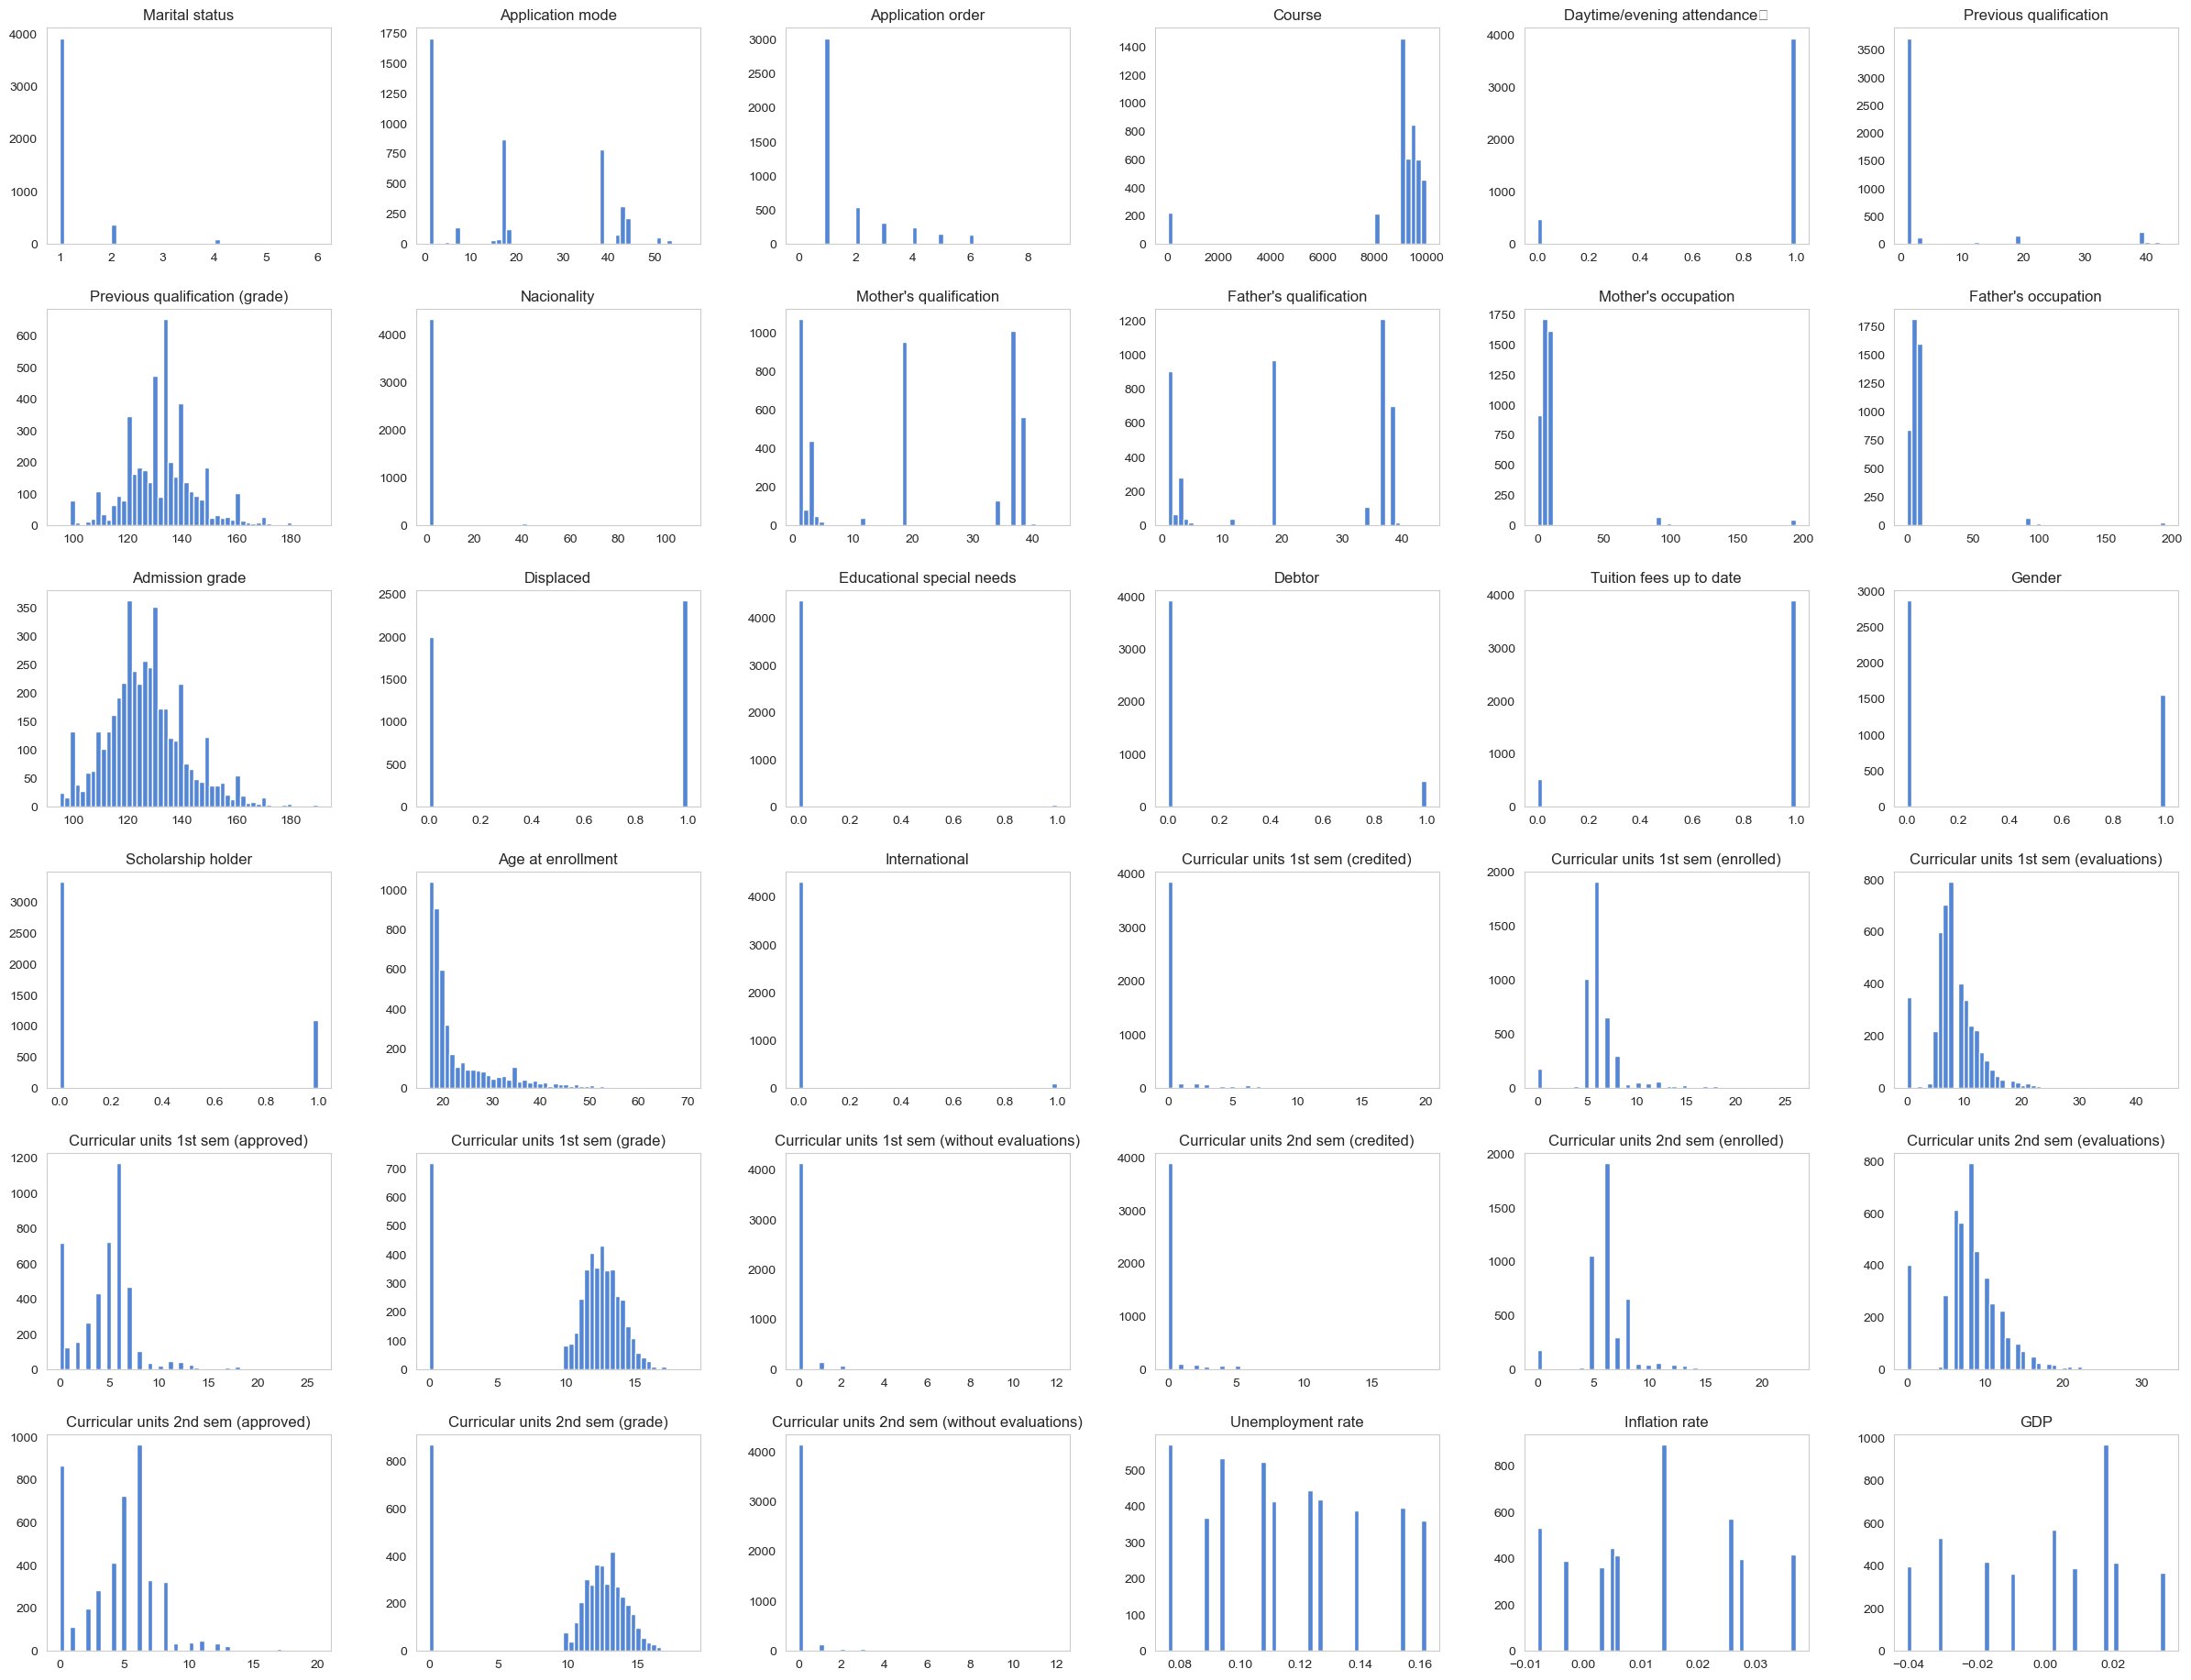

<function matplotlib.pyplot.show(close=None, block=None)>

In [66]:
student_data[student_data.columns].hist(bins= 50, figsize=(30,23), color='#5486d6')
for ax in plt.gcf().get_axes():
    ax.grid(False)

plt.show()
plt.show

In [87]:
from scipy.stats import shapiro
stat, p = shapiro(student_data['Age at enrollment'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.707, p=0.000
Sample does not look Gaussian (reject H0)


In [88]:
student_data['Age at enrollment'] = np.log(student_data['Age at enrollment'])

In [89]:
continuous_data = student_data[['Previous qualification (grade)', 'Age at enrollment', 
                                'Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (approved)',
                                'Curricular units 2nd sem (approved)',
                                'Unemployment rate', 'Inflation rate', 'GDP']]
print(continuous_data)

      Previous qualification (grade)  Age at enrollment  Admission grade  \
0                              122.0           2.995732            127.3   
1                              160.0           2.944439            142.5   
2                              122.0           2.944439            124.8   
3                              122.0           2.995732            119.6   
4                              100.0           3.806662            141.5   
...                              ...                ...              ...   
4419                           125.0           2.944439            122.2   
4420                           120.0           2.890372            119.0   
4421                           154.0           3.401197            149.5   
4422                           180.0           2.995732            153.8   
4423                           152.0           3.091042            152.0   

      Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  \
0          

/Users/lincolntrelease/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


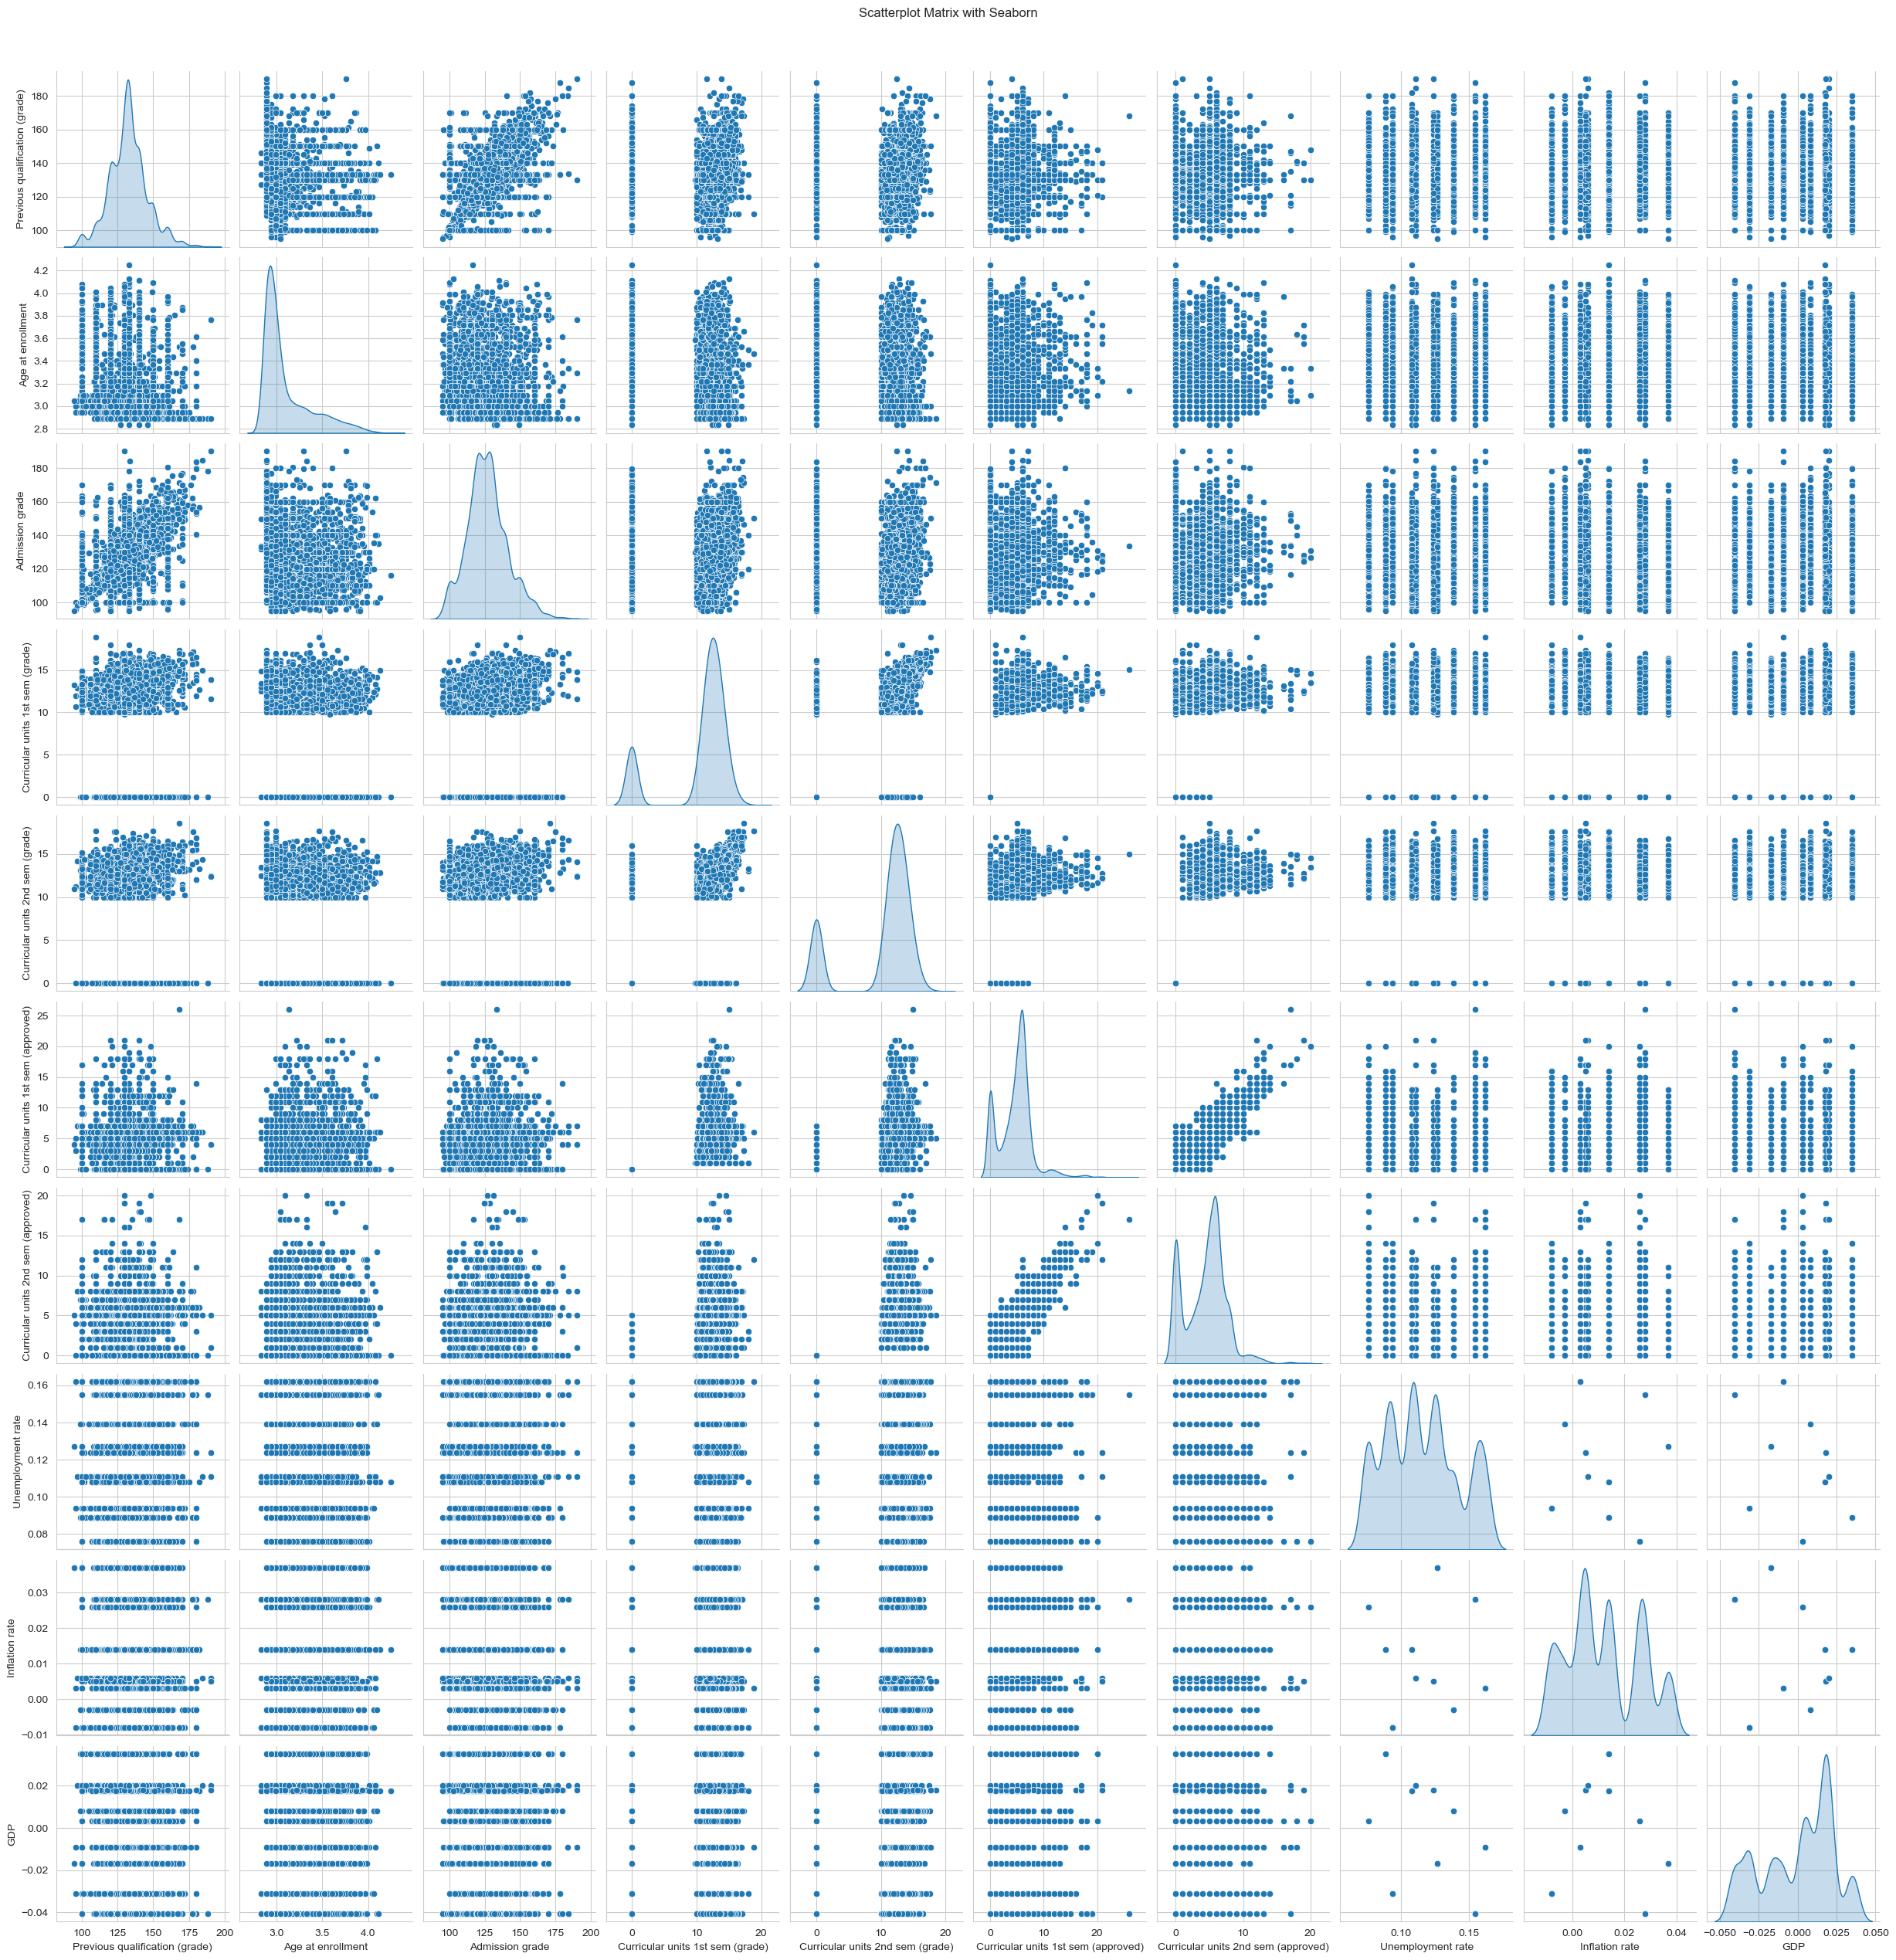

In [90]:
import seaborn as sns
sns.pairplot(continuous_data, diag_kind='kde')
plt.suptitle('Scatterplot Matrix with Seaborn', y=1.02)
plt.show()

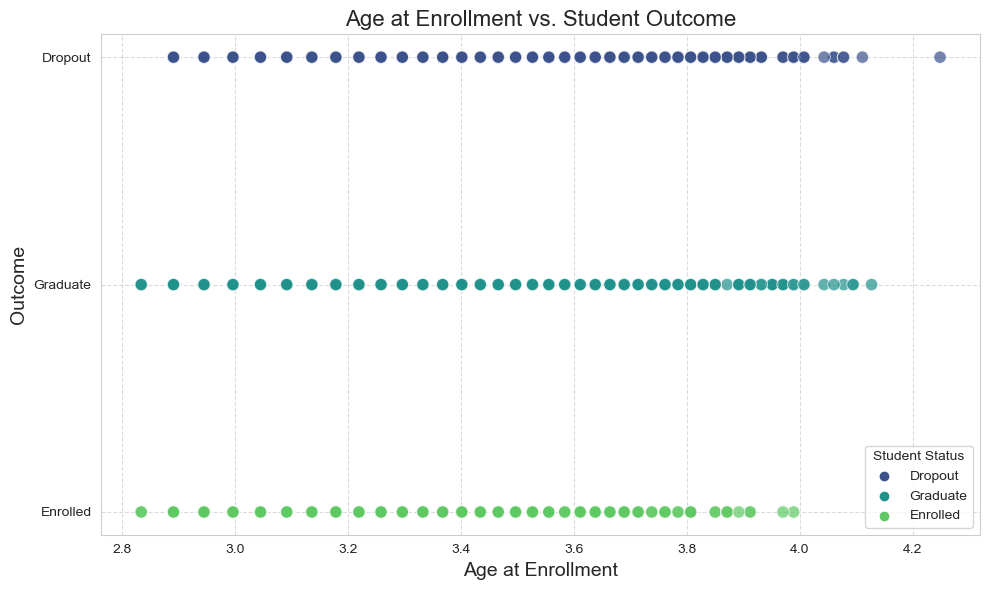

In [91]:
plt.figure(figsize=(10, 6))

# Method 1: Using Seaborn (recommended for categorical targets)
sns.scatterplot(
    data=student_data,
    x='Age at enrollment',
    y='Target',
    hue='Target',  # Color by target
    palette='viridis',  # Color palette
    s=80,  # Point size
    alpha=0.7  # Transparency
)

plt.title('Age at Enrollment vs. Student Outcome', fontsize=16)
plt.xlabel('Age at Enrollment', fontsize=14)
plt.ylabel('Outcome', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Student Status')
plt.tight_layout()
plt.show()

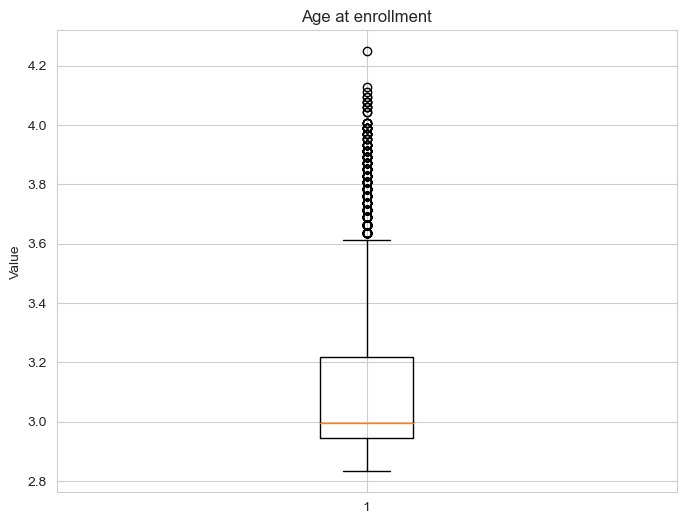

In [92]:
# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(student_data['Age at enrollment'])
plt.title('Age at enrollment')
plt.ylabel('Value')
plt.show()

<Axes: >

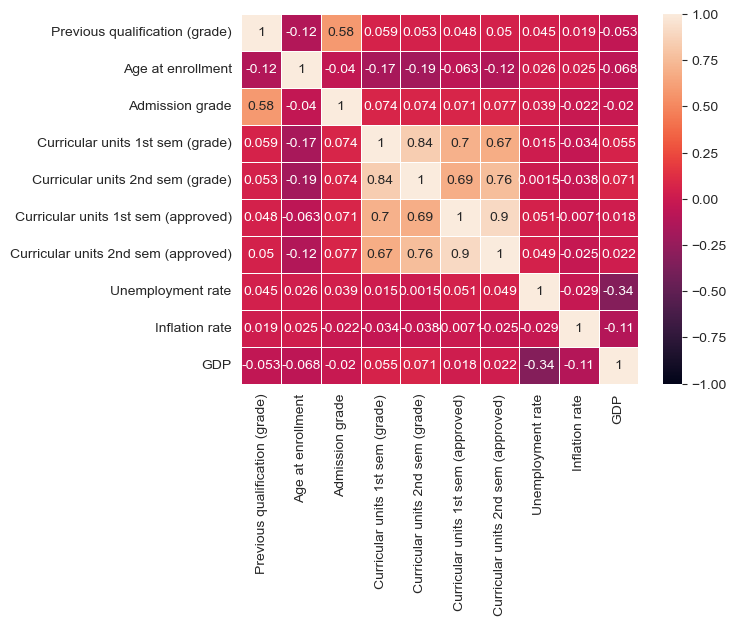

In [93]:
correlations = continuous_data.corr()
sns.heatmap(correlations, annot=True, vmin=-1, vmax=1, linewidth=.5)

In [94]:
df_group_by_type = student_data.groupby('Target')['Curricular units 1st sem (grade)'].apply(np.mean)
df_group_by_type

Target
Dropout      7.256656
Enrolled    11.125257
Graduate    12.643655
Name: Curricular units 1st sem (grade), dtype: float64

In [95]:
from scipy import stats
group1 = student_data[student_data['Target'] == 'Dropout']['Curricular units 1st sem (grade)']
group2 = student_data[student_data['Target'] == 'Graduate']['Curricular units 1st sem (grade)']
t_statistic, p_value = stats.ttest_ind(group1, group2, alternative='less')
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -36.66157442800798
p-value: 6.645336697163824e-251


In [96]:
from scipy import stats
group1 = student_data[student_data['Target'] == 'Dropout']['Curricular units 2nd sem (grade)']
group2 = student_data[student_data['Target'] == 'Graduate']['Curricular units 2nd sem (grade)']
t_statistic, p_value = stats.ttest_ind(group1, group2, alternative='less')
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: -45.80885206007108
p-value: 0.0


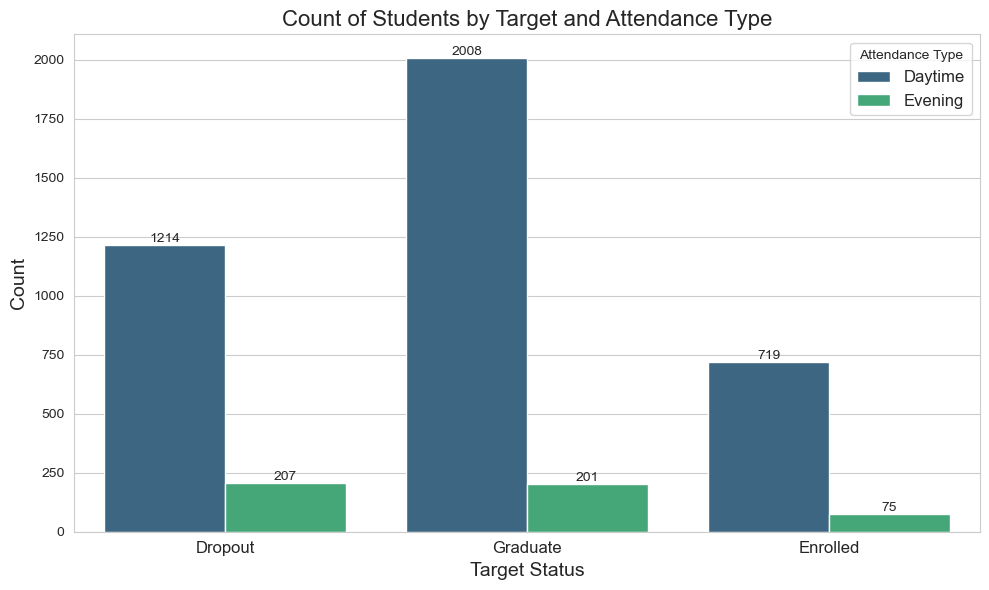

In [97]:
# Set up the plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the count plot (histogram)
ax = sns.countplot(x='Target', hue='Daytime/evening attendance\t', data=student_data, palette='viridis',
                   hue_order=[1, 0])

# Add labels and title
plt.title('Count of Students by Target and Attendance Type', fontsize=16)
plt.xlabel('Target Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Daytime', 'Evening'], title='Attendance Type', fontsize=12)
# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

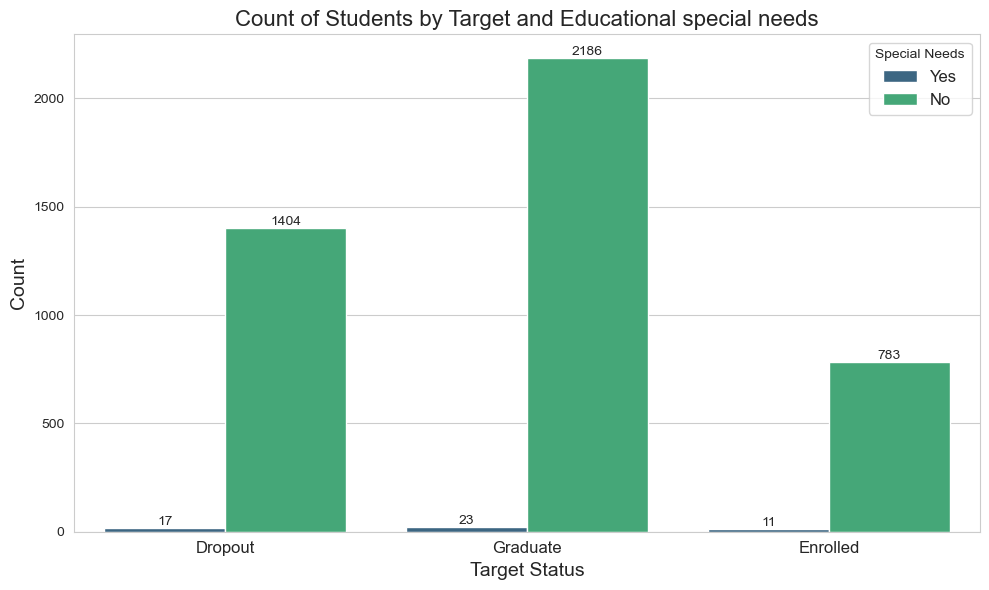

In [98]:
# Set up the plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the count plot (histogram)
ax = sns.countplot(x='Target', hue='Educational special needs', data=student_data, palette='viridis',
                   hue_order=[1, 0])

# Add labels and title
plt.title('Count of Students by Target and Educational special needs', fontsize=16)
plt.xlabel('Target Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Yes', 'No'], title='Special Needs', fontsize=12)
# Add count labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [99]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = student_data[['Daytime/evening attendance\t', 'Educational special needs']]
Y = student_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print("\nModel Coefficients:")
print(model.coef_)
print("\nModel Intercepts:")
print(model.intercept_)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Model Coefficients:
[[-0.38193801  0.11670925]
 [ 0.21367707  0.03888529]
 [ 0.16826094 -0.15559455]]

Model Intercepts:
[ 0.35331496 -0.7104993   0.35718434]
Accuracy: 0.47231638418079097


In [100]:
daytime = student_data[student_data['Daytime/evening attendance\t'] == 1]
evening = student_data[student_data['Daytime/evening attendance\t'] == 0]

print(evening)
print(daytime)

      Marital status  Application mode  Application order  Course  \
4                  2                39                  1    8014   
5                  2                39                  1    9991   
33                 1                18                  1    8014   
34                 1                 1                  1    9991   
38                 4                39                  1    9991   
...              ...               ...                ...     ...   
4383               1                39                  2    8014   
4387               2                 1                  1    9991   
4393               1                39                  1    9991   
4400               2                39                  1    9991   
4409               2                43                  1    9991   

      Daytime/evening attendance\t  Previous qualification  \
4                                0                       1   
5                                0             

In [101]:
X= daytime.drop(columns=['Target'])
Y = daytime['Target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 10000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print("\nModel Coefficients:")
print(model.coef_)
print("\nModel Intercepts:")
print(model.intercept_)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Model Coefficients:
[[-2.98446211e-02  2.89820225e-03  3.19938849e-02  8.24758334e-05
  -6.99387559e-03 -4.16603164e-03  9.18320607e-04  2.16367211e-03
   5.12374306e-03 -7.26492954e-04 -7.02817941e-03  7.67877845e-04
  -2.51091899e-04  3.94877215e-02 -6.56409275e-03  5.23754525e-01
  -1.36289683e+00  2.51197065e-01 -3.81924079e-01  4.24360870e-01
  -1.06198388e-01 -1.89925517e-02  1.12760317e-01 -5.77790445e-03
  -2.28160887e-01  4.12275627e-02 -3.48249669e-02  2.04051182e-01
   3.88117710e-01 -3.53556818e-02 -4.41195565e-01 -1.14877232e-01
  -3.40238598e-02  2.80250766e-02 -1.41948611e-03  7.14329379e-03]
 [ 1.03909457e-02  1.90519138e-03 -2.38243453e-02  2.45714154e-06
   3.88758684e-02 -2.85984341e-04 -5.30847155e-05  1.43761491e-03
  -8.16438385e-03 -1.80489059e-03  1.39255652e-03  2.53376620e-03
  -3.52804063e-03  3.52786935e-02  6.61439444e-02  1.27329393e-01
   4.42543662e-01 -1.56333319e-02 -1.68796288e-01 -1.42155503e-01
   3.41006266e-02  4.93333178e-02  6.99521006e-02  2.1

In [102]:
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})
print("\nFeature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))




Feature Importance (Coefficient and Odds Ratio):
                                           Feature  Coefficient  Odds Ratio
15                                          Debtor     0.523755    1.688355
19                               Age at enrollment     0.424361    1.528613
28             Curricular units 2nd sem (enrolled)     0.388118    1.474203
17                                          Gender     0.251197    1.285563
27             Curricular units 2nd sem (credited)     0.204051    1.226361
22             Curricular units 1st sem (enrolled)     0.112760    1.119364
25                Curricular units 1st sem (grade)     0.041228    1.042089
13                                       Displaced     0.039488    1.040278
2                                Application order     0.031994    1.032511
33                               Unemployment rate     0.028025    1.028421
35                                             GDP     0.007143    1.007169
8                           Mother's q

In [103]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
perm_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance Mean': perm_importance.importances_mean,
    'Importance Std': perm_importance.importances_std
})
print("\nPermutation Importance:")
print(perm_importance_df.sort_values(by='Importance Mean', ascending=False))




Permutation Importance:
                                           Feature  Importance Mean  \
30             Curricular units 2nd sem (approved)         0.205070   
24             Curricular units 1st sem (approved)         0.118927   
31                Curricular units 2nd sem (grade)         0.051711   
28             Curricular units 2nd sem (enrolled)         0.044571   
16                         Tuition fees up to date         0.028052   
22             Curricular units 1st sem (enrolled)         0.016096   
3                                           Course         0.007351   
11                             Father's occupation         0.005957   
19                               Age at enrollment         0.004901   
25                Curricular units 1st sem (grade)         0.004901   
15                                          Debtor         0.004563   
8                           Mother's qualification         0.004267   
10                             Mother's occupation  

In [104]:
# Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe_model = LogisticRegression(max_iter=10000, solver='liblinear')
rfe = RFE(rfe_model, n_features_to_select=5)
rfe.fit(X_train, y_train)


rfe_features = X.columns[rfe.support_]
print("\nSelected Features by RFE:")
print(rfe_features)


Selected Features by RFE:
Index(['Daytime/evening attendance\t', 'Tuition fees up to date',
       'Scholarship holder', 'Age at enrollment', 'Unemployment rate'],
      dtype='object')


In [105]:
X_1 = daytime[['Daytime/evening attendance\t', 'Tuition fees up to date', 'Scholarship holder',
               'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (approved)',
                'Curricular units 2nd sem (grade)']]
Y_1 = daytime['Target']
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, Y_1, test_size=0.2, random_state=42)

# Create a multinomial logistic regression model
model_1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model
model_1.fit(X1_train, y1_train)

# Predict on the test set
y1_pred = model_1.predict(X1_test)

print("\nModel Coefficients:")
print(model_1.coef_)
print("\nModel Intercepts:")
print(model_1.intercept_)

# Evaluate the model
accuracy_1 = accuracy_score(y1_test, y1_pred)
print(f"Accuracy: {accuracy_1}")


Model Coefficients:
[[-0.00689888 -1.6048388  -0.41664255  0.50781236 -0.54237879 -0.10183059]
 [ 0.00400164  0.10475564 -0.19544025  0.21145374 -0.31250824  0.04315605]
 [ 0.00289725  1.50008316  0.61208281 -0.7192661   0.85488702  0.05867454]]

Model Intercepts:
[ 1.89699744 -0.40027779 -1.49671965]
Accuracy: 0.7541191381495564


In [106]:
X= evening.drop(columns=['Target'])
Y = evening['Target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 10000)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print("\nModel Coefficients:")
print(model.coef_)
print("\nModel Intercepts:")
print(model.intercept_)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Model Coefficients:
[[-1.38611044e-01  6.60341027e-03  7.64823090e-02  1.80097895e-04
   0.00000000e+00  1.58150566e-02 -1.91773635e-03 -8.81529787e-03
   1.42045914e-02 -3.11540884e-02 -6.83358577e-03 -4.82020702e-04
   3.37321486e-03  5.28322245e-01  1.95517800e-01  7.31620310e-01
  -1.77484024e+00  2.67037045e-01 -7.18730653e-01  1.02002545e+00
  -2.90350570e-02  2.19363048e-01  4.36833016e-01 -1.58154714e-02
  -4.85122201e-01 -1.40092316e-01  3.54073802e-01  1.02487927e-01
   2.92675832e-03  2.44832445e-03 -5.65931967e-01 -1.36031429e-02
  -1.19409634e-01  1.12747476e-01 -4.72788915e-02 -8.85248327e-03]
 [-1.70769862e-02 -6.76039257e-03  4.72666604e-02  2.68705872e-04
   0.00000000e+00 -5.86416743e-03 -5.07224202e-04  1.78438346e-02
   1.88495164e-02 -5.58216788e-03 -3.71328853e-03  5.70457165e-03
  -2.10622490e-03 -5.32391068e-01 -1.48472784e-01 -6.07434301e-02
   9.00401619e-01 -1.54917840e-01  3.31291606e-01 -1.57847198e-01
  -3.04646904e-01  4.96472505e-02  4.42098960e-02 -1.2

In [116]:
from sklearn.ensemble import RandomForestClassifier
X= evening.drop(columns=['Target'])
Y = evening['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.7364341085271318


              precision    recall  f1-score   support

     Dropout       0.72      0.87      0.79       152
    Enrolled       0.36      0.15      0.21        62
    Graduate       0.80      0.83      0.82       173

    accuracy                           0.74       387
   macro avg       0.63      0.62      0.60       387
weighted avg       0.70      0.74      0.71       387



[[132   6  14]
 [ 32   9  21]
 [ 19  10 144]]


In [115]:
from sklearn.metrics import classification_report, confusion_matrix
X= daytime.drop(columns=['Target'])
Y = daytime['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print(confusion_matrix(y_test,y_pred))

Accuracy: 0.7532508721852205


              precision    recall  f1-score   support

     Dropout       0.74      0.78      0.76       956
    Enrolled       0.62      0.18      0.27       586
    Graduate       0.77      0.94      0.85      1611

    accuracy                           0.75      3153
   macro avg       0.71      0.64      0.63      3153
weighted avg       0.73      0.75      0.72      3153



[[ 750   34  172]
 [ 200  103  283]
 [  59   30 1522]]
